#### Name: Aamir Husain

# Deep learning from scratch
## Homework 3
### Exercise 3

-----

### General instructions

Complete the exercise listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells. 

Throughout this homework we make use of version 1.0 of your deep learning library `my_first_DL_lib` - so make sure you have completed the first exercise before doing this one!

In [1]:
# define path to datasets
datapath = 'datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# plotting utilities
import matplotlib.pyplot as plt
from matplotlib import gridspec

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# automatically refresh if anything has changed in a backend file
%load_ext autoreload
%autoreload 2

### When submitting this homework:

Make sure you have put your name at the top of each file
    
Make sure all output is present in your notebook prior to submission

----

## <span style="color:#a50e3e;">Exercise 3. </span> Normalized gradient descent with momentum

In this Exercise you implement a momentum-adjusted *normalized gradient descent* algorithm and use it to perform multiclass classification on a preprocessed subset of $10,000$ images from the [MNIST handwritten digit dataset](https://en.wikipedia.org/wiki/MNIST_database), which is located in the ```datasets``` folder and called ``mnist_contrast_normalized.csv``

The details regarding implementation of normalized gradient descent and momentum can be found in [Section 13.3.1](https://jermwatt.github.io/mlrefined/blog_posts/13_Multilayer_perceptrons/13_3_Normalized_gradient_descent.html)
and 
[Section 13.5](https://jermwatt.github.io/mlrefined/blog_posts/13_Multilayer_perceptrons/13_5_Momentum_methods.html) of the course notes, respectively. 

Activate the Python cell below to load in the data. 

In [2]:
data = np.loadtxt(datapath + 'mnist_test_contrast_normalized.csv', delimiter = ',')
x = data[:,:-1].T
y = data[:,-1:].T

For this Exercise, choose a multilayer perceptron with three hidden layers and ReLU activation, having $30$, $20$, and $10$ units in its first, second, and third layer, respectively. Note that the dimension of the input layer is, as always, determined by the input dimension of ``x``, and that of the output layer by the number of classes in the data.   

Also make sure to use standard normalization along with the multiclass softmax cost to perform this Exercise.

Run normalized gradient descent for a maximum of $200$ iterations with three values of beta ($\beta=0$, $\beta=0.2$, and $\beta=0.9$).

Choose an appropriate steplength - one that takes the form of $\alpha = 10^\gamma$ where $\gamma $ is an integer - and keep it fixed for all three runs of normalized gradient descent. 

Plot the cost/misclassification histories to produce a figure like the one shown below. 

<figure><img src="images/Ex2.png"></figure>

In [3]:
from dl_lib import deep_learner as DL
costs = []
weights = []
counts = []

learner = DL.Setup(x, y)
learner.choose_normalizer(name = 'standard')
N = 784
M = 10
layer_sizes = [N, 30, 20, 10, M]
learner.choose_features(name = 'multilayer_perceptron', layer_sizes = layer_sizes, activation = 'relu', scale = .15)
learner.choose_cost(name = 'multiclass_softmax')
beta = [0.0, 0.2, 0.9]
for i in beta:
    learner.optimize(max_its = 200, alpha_choice = 1, version = 'normalized', beta = i)
    
costs.append(learner.costs)
weights.append(learner.weights)
counts.append(learner.counts)

Data Normalized as: standard
Feature transform: multilayer_perceptron
Activation: relu
Layer sizes: [784, 30, 20, 10, 10]
Cost function set to: multiclass_softmax
Using counter: multiclass_counter
Normalized gradient descent with alpha = 0.1 and beta = 0.0 @ 200 iterations
Normalized gradient descent with alpha = 0.1 and beta = 0.2 @ 200 iterations
Normalized gradient descent with alpha = 0.1 and beta = 0.9 @ 200 iterations


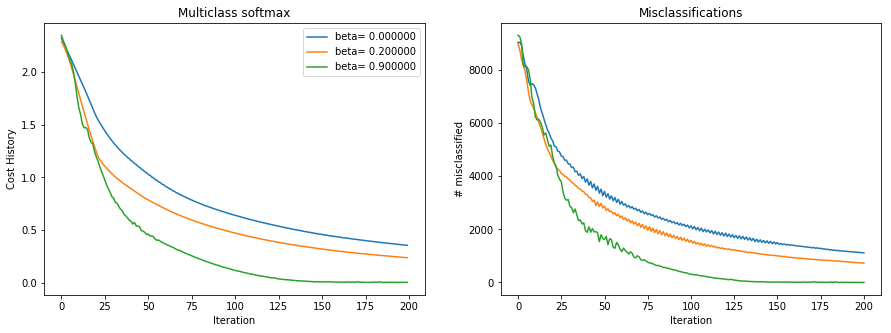

In [4]:
# Plot
fig = plt.figure(figsize = (15,5))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0]);
ax2 = plt.subplot(gs[1]);

fig.set_tight_layout(False)
for i in range(len(weights[0])):
    ax1.plot(np.arange(0,len(costs[0][0])),costs[0][i],label='beta= %f' %beta[i])
    ax2.plot(np.arange(0,len(weights[0][0])),counts[0][i])
    
ax2.set_title('Misclassifications')
ax2.set_ylabel('# misclassified')
ax2.set_xlabel('Iteration')
ax1.set_title('Multiclass softmax')
ax1.set_ylabel('Cost History')
ax1.set_xlabel('Iteration')
ax1.legend()

plt.show()